# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# lat_data_df = pd.DataFrame({'lats':lats,})
# lat_data_df = lat_data_df[:10]
cities_df = pd.DataFrame({'city':cities})
cities_df.head()

,city
0,aklavik
1,punta arenas
2,rikitea
3,ushuaia
4,teguise


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
params = {"key": g_key}

# Loop through the cities_df and run a lat/long search for each city
for index, row in cities_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['city']
#     state = row['State']

    # udfate address key value
    params['address'] = f"{city}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        cities_df.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        cities_df.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
        print 
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# Visualize to confirm lat lng appear
cities_df.head()

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.


,city,Lat,Lng
0,aklavik,68.219916,-135.007788
1,punta arenas,-53.163833,-70.917068
2,rikitea,-23.122303,-134.969154
3,ushuaia,-54.801912,-68.302951
4,teguise,29.072052,-13.566830


In [7]:
cities_df

,city,Lat,Lng
0,aklavik,68.219916,-135.007788
1,punta arenas,-53.163833,-70.917068
2,rikitea,-23.122303,-134.969154
3,ushuaia,-54.801912,-68.302951
4,teguise,29.072052,-13.566830
...,...,...,...
591,garachine,8.031769,-78.315941
592,ugoofaaru,5.667588,73.030197
593,atambua,-9.101629,124.912066
594,samana,19.203076,-69.338766


In [22]:
params = {
    "units":"imperial",
    "APPID": weather_api_key
}
record = 0
set1 = 1
for index, row in cities_df.iterrows():
    
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    lat = row['Lat']
    lon = row['Lng']
    
    params["lat"] = f"{lat}"
    params['lon'] = f"{lon}"

    weather_data = requests.get(base_url,params=params)

    weather_data = weather_data.json()

    try:
        cities_df.loc[index,"temp"] =weather_data["main"]["temp"]
        cities_df.loc[index,"hum"] = weather_data["main"]["humidity"]
        cities_df.loc[index,"pres"] = weather_data["main"]["pressure"]
        cities_df.loc[index,"cloud"] = weather_data["clouds"]["all"]
        cities_df.loc[index,"wind"] = weather_data["wind"]["speed"]
        cities_df.loc[index,"country"] = weather_data["sys"]["country"]
        cities_df.loc[index,"date"] = weather_data["sys"]["sunrise"]
        if record <= 49:
            record = record + 1
        else:
            set1 = set1 + 1
            record = 1
        print("record = " + str(record) + ", set = " + str(set1) + " | " + cities_df.loc[index,"city"])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

cities_df.head()

        

record = 1, set = 1 | aklavik
record = 2, set = 1 | punta arenas
record = 3, set = 1 | rikitea
record = 4, set = 1 | ushuaia
record = 5, set = 1 | teguise
record = 6, set = 1 | chuy
record = 7, set = 1 | cap malheureux
record = 8, set = 1 | hermanus
record = 9, set = 1 | pechenga
record = 10, set = 1 | srednekolymsk
Missing field/result... skipping.
record = 11, set = 1 | isla mujeres
record = 12, set = 1 | srivardhan
record = 13, set = 1 | clyde river
record = 14, set = 1 | port alfred
record = 15, set = 1 | nizhneyansk
record = 16, set = 1 | hambantota
record = 17, set = 1 | karauzyak
record = 18, set = 1 | barrow
record = 19, set = 1 | grand river south east
record = 20, set = 1 | ahipara
record = 21, set = 1 | isangel
record = 22, set = 1 | ketchikan
record = 23, set = 1 | hilo
record = 24, set = 1 | upernavik
record = 25, set = 1 | jimma
record = 26, set = 1 | vuktyl
record = 27, set = 1 | vaini
record = 28, set = 1 | cidreira
record = 29, set = 1 | bredasdorp
record = 30, set = 1

record = 2, set = 6 | cherskiy
record = 3, set = 6 | coihaique
record = 4, set = 6 | nemuro
record = 5, set = 6 | gambela
record = 6, set = 6 | okato
record = 7, set = 6 | yar-sale
record = 8, set = 6 | leninskoye
record = 9, set = 6 | carnarvon
record = 10, set = 6 | hofn
record = 11, set = 6 | verkhnyaya inta
record = 12, set = 6 | coquimbo
record = 13, set = 6 | college
record = 14, set = 6 | taoudenni
record = 15, set = 6 | paramonga
record = 16, set = 6 | qixingtai
record = 17, set = 6 | xuanzhou
record = 18, set = 6 | cockburn town
record = 19, set = 6 | tautira
record = 20, set = 6 | bilma
record = 21, set = 6 | attawapiskat
record = 22, set = 6 | pingliang
record = 23, set = 6 | tawnat
record = 24, set = 6 | kapoeta
record = 25, set = 6 | laytown
record = 26, set = 6 | agirish
record = 27, set = 6 | mrirt
record = 28, set = 6 | salo
record = 29, set = 6 | meyungs
record = 30, set = 6 | jiuquan
record = 31, set = 6 | belawan
record = 32, set = 6 | tabiauea
Missing field/result..

record = 3, set = 11 | mandurah
record = 4, set = 11 | baiyin
record = 5, set = 11 | atikokan
record = 6, set = 11 | tuatapere
record = 7, set = 11 | puerto escondido
record = 8, set = 11 | ouallam
record = 9, set = 11 | barao de cocais
record = 10, set = 11 | mackenzie
record = 11, set = 11 | westport
record = 12, set = 11 | chalus
record = 13, set = 11 | hays
record = 14, set = 11 | berlevag
record = 15, set = 11 | louisbourg
record = 16, set = 11 | ligayan
record = 17, set = 11 | touros
record = 18, set = 11 | lata
record = 19, set = 11 | leningradskiy
record = 20, set = 11 | henties bay
record = 21, set = 11 | mattru
record = 22, set = 11 | tempio pausania
record = 23, set = 11 | lubao
record = 24, set = 11 | carauari
record = 25, set = 11 | bowen
record = 26, set = 11 | arinos
record = 27, set = 11 | bell ville
record = 28, set = 11 | roebourne
record = 29, set = 11 | galle
record = 30, set = 11 | kon tum
record = 31, set = 11 | romans-sur-isere
record = 32, set = 11 | liepaja
rec

,city,Lat,Lng,temp,hum,pres,cloud,wind,country,date
0,aklavik,68.219916,-135.007788,50.00,93.0,1012.0,90.0,8.05,CA,1.596020e+09
1,punta arenas,-53.163833,-70.917068,41.00,75.0,1011.0,40.0,18.34,CL,1.596026e+09
2,rikitea,-23.122303,-134.969154,72.81,81.0,1021.0,8.0,12.55,PF,1.596037e+09
3,ushuaia,-54.801912,-68.302951,39.20,87.0,1005.0,40.0,32.21,AR,1.596026e+09
4,teguise,29.072052,-13.566830,80.60,57.0,1012.0,20.0,25.28,ES,1.596003e+09


In [28]:
cities_df_drop = cities_df.dropna()


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
cities_df_drop.to_csv("Cities_Weather_Data.csv")
cities_df_drop.count()

city       586
Lat        586
Lng        586
temp       586
hum        586
pres       586
cloud      586
wind       586
country    586
date       586
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
cities_df_drop[cities_df_drop['hum']<=100].count()

# No problems with humidity > %100%


city       586
Lat        586
Lng        586
temp       586
hum        586
pres       586
cloud      586
wind       586
country    586
date       586
dtype: int64

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

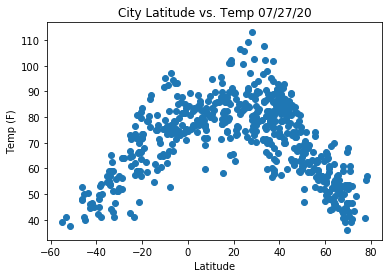

In [44]:

plt.scatter(cities_df_drop['Lat'],cities_df_drop['temp'])
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Temp 07/27/20")

plt.savefig("LatitudevsTemp.png")

# This plot shows that temperatures are higher towards the equator and lower towards the poles.

## Latitude vs. Humidity Plot

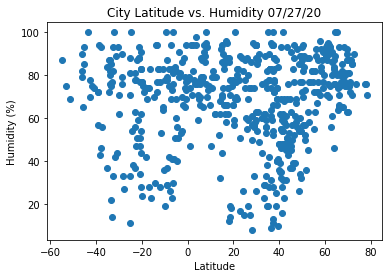

In [45]:
plt.scatter(cities_df_drop['Lat'],cities_df_drop['hum'])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity 07/27/20")

plt.savefig("LatitudevsHumidity.png")

# In general the data looks highly variable, but it does appear 
# Humidity near the equator looks to be more concentrated between 70-90%.  

## Latitude vs. Cloudiness Plot

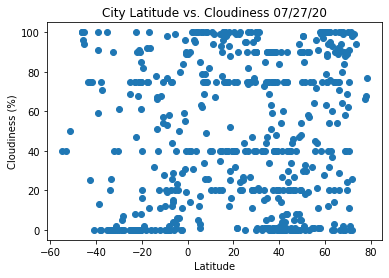

In [46]:
plt.scatter(cities_df_drop['Lat'],cities_df_drop['cloud'])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness 07/27/20")

plt.savefig("LatitudevsCloudiness.png")

# There appears to be no correlation between latitude and cloudiness.
# The data does not appear to be very precise because most of the data points are in lines at 0, 20, 40, 75, and 100

## Latitude vs. Wind Speed Plot

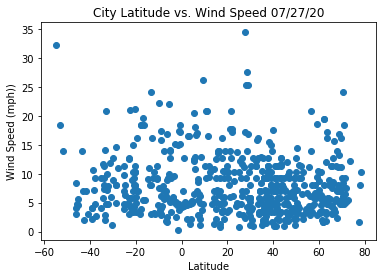

In [47]:
plt.scatter(cities_df_drop['Lat'],cities_df_drop['wind'])
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed 07/27/20")

plt.savefig("LatitudevsWindSpeed.png")

# Wind speed and latitude appear to have no correlation

## Linear Regression

In [34]:
# OPTIONAL: Create a function to create Linear Regression plots
def trendline(x,y):
    import scipy.stats as st
    slope, inter, r, p, std_err = st.linregress(x,y)
    fit = slope * x + inter
    plt.plot(x,fit,"--r",label="y = "+ str(round(slope,2)) + "x + "+ str(round(inter,1))+', r = ' + str(round(r,2)))
    plt.legend()
    

In [35]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_cities_df_drop= cities_df_drop[cities_df_drop['Lat']>0]
south_hem_cities_df_drop=cities_df_drop[cities_df_drop['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

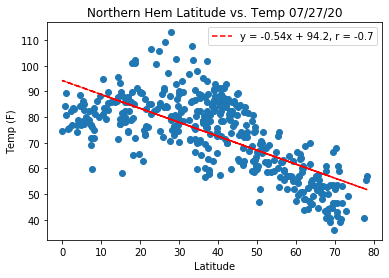

In [48]:
plt.scatter(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['temp'])
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.title("Northern Hem Latitude vs. Temp 07/27/20")
trendline(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['temp'])

plt.savefig("NorthernHemLatitudevsTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

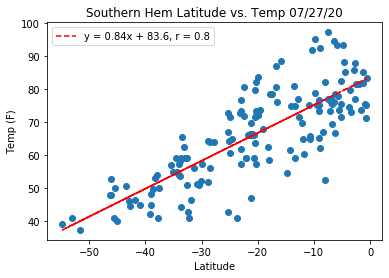

In [49]:
plt.scatter(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['temp'])
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.title("Southern Hem Latitude vs. Temp 07/27/20")
trendline(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['temp'])

plt.savefig("SouthernHemLatitudevsTemp.png")

# These plots show there is a good correlation between latitude and Temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

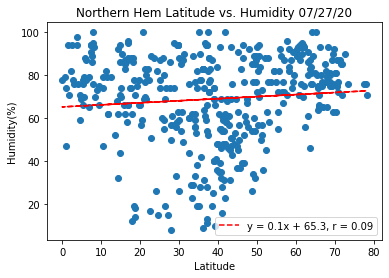

In [50]:
plt.scatter(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['hum'])
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.title("Northern Hem Latitude vs. Humidity 07/27/20")
trendline(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['hum'])

plt.savefig("NorthernHemLatitudevsHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

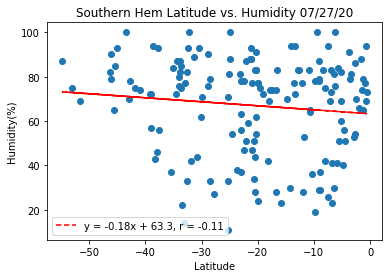

In [51]:
plt.scatter(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['hum'])
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.title("Southern Hem Latitude vs. Humidity 07/27/20")
trendline(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['hum'])

plt.savefig("SouthernHemLatitudevsHumidity.png")

# Humidity has no correlation to latitude.  Humidity is more dependent on elevation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

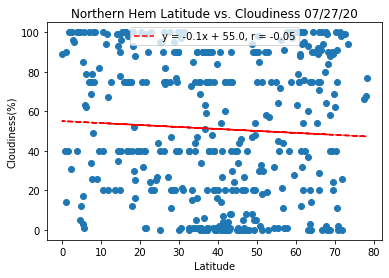

In [52]:
plt.scatter(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['cloud'])
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.title("Northern Hem Latitude vs. Cloudiness 07/27/20")
trendline(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['cloud'])

plt.savefig("NorthernHemLatitudevsCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

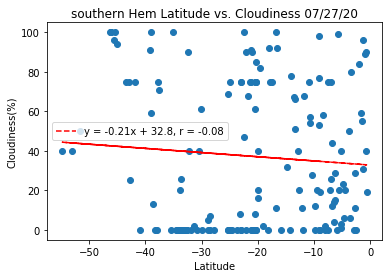

In [53]:
plt.scatter(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['cloud'])
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.title("southern Hem Latitude vs. Cloudiness 07/27/20")
trendline(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['cloud'])

plt.savefig("SouthernHemLatitudevsCloudiness.png")

# Cloudiness has not coreelation to latitude.  There are a significant amount of variables that effect Cloudiness
# making a bivariate analysis inadequate 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

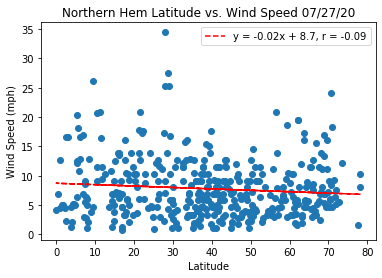

In [54]:
plt.scatter(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['wind'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hem Latitude vs. Wind Speed 07/27/20")
trendline(north_hem_cities_df_drop['Lat'],north_hem_cities_df_drop['wind'])

plt.savefig("NorthernHemLatitudevsWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

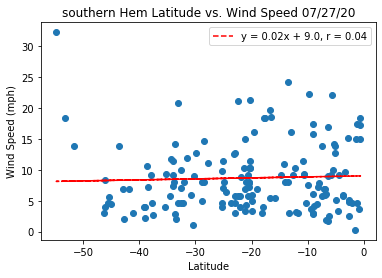

In [55]:
plt.scatter(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['wind'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("southern Hem Latitude vs. Wind Speed 07/27/20")
trendline(south_hem_cities_df_drop['Lat'],south_hem_cities_df_drop['wind'])

plt.savefig("SouthernHemLatitudevsWindSpeed.png")

# Wind speed has no correlation with latitudes.  Wind also has a high number of variables that 
# that make bivariate analysis inadequate